In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Data counts (image counts)

In [1]:
# read in the csv
import pandas as pd
import numpy as np

df = pd.read_csv('/bask/homes/f/fspo1218/amber/data/binary_moth_training/gbif_crop_ready/datacount.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/bask/homes/f/fspo1218/amber/data/binary_moth_training/gbif_crop_ready/datacount.csv'

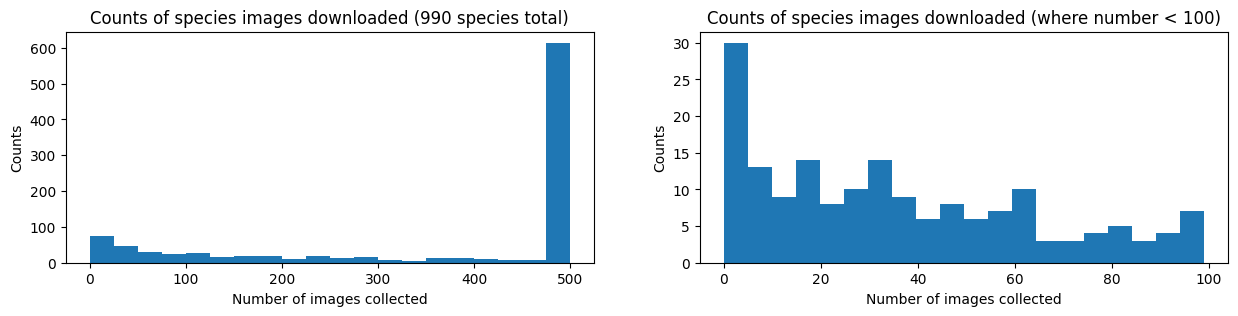

In [3]:
# create a histogram of the counts
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].hist(df['count'], bins=20)
ax[0].set_title('Counts of species images downloaded (990 species total)')
ax[0].set_xlabel('Number of images collected')
ax[0].set_ylabel('Counts')


ax[1].hist(df.loc[df['count'] < 100, 'count'], bins=20)
ax[1].set_title('Counts of species images downloaded (where number < 100)')
ax[1].set_xlabel('Number of images collected')
ax[1].set_ylabel('Counts')

plt.show()


df = pd.read_csv('/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper')

In [4]:
df = pd.read_csv('/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper/data_statistics.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/bask/projects/v/vjgo8416-amber/data/gbif-species-trainer-AMI-fork/gbif_images/try_wrapper/data_statistics.csv'

KeyError: 'image_count'

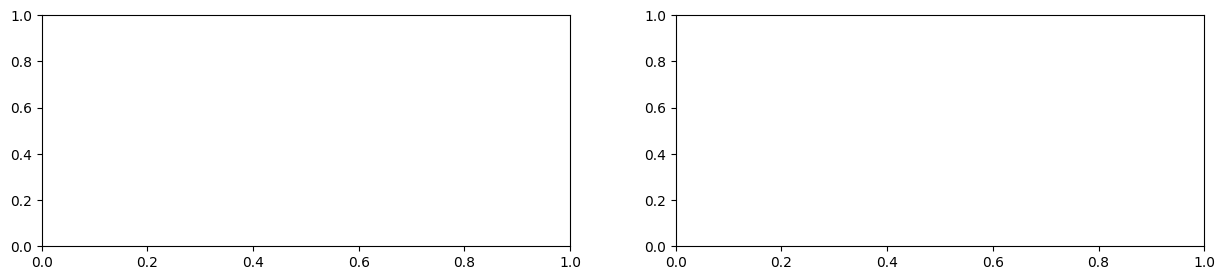

In [5]:
# create a histogram of the counts
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].hist(df['image_count'], bins=20)
ax[0].set_title('Counts of species images downloaded (' + str(df.shape[0]) + ' species total)')
ax[0].set_xlabel('Number of images collected')
ax[0].set_ylabel('Counts')


ax[1].hist(df.loc[df['image_count'] < 100, 'image_count'], bins=20)
ax[1].set_title('Counts of species images downloaded (where number < 100)')
ax[1].set_xlabel('Number of images collected')
ax[1].set_ylabel('Counts')

plt.show()

In [2]:
import pandas as pd
df = pd.read_csv('/bask/projects/v/vjgo8416-amber/projects/on_device_classifier/02_model_training/pytorch/myfile.csv', on_bad_lines='skip')

df.head()

,True_label,True_family,True_genus,True_label_index,Pytorch_prediction,Pytorch_family,Pytorch_genus,Pytorch_prediction_index,TFLite_prediction,TFLite_family,TFLite_genus,TFLite_prediction_index,Pytorch_top10,Pytorch_top3,Pytorch_top1,TFLite_top10,TFLite_top3,TFLite_top1,Unnamed: 18
0,Macaria wauaria,Geometridae,Macaria,139,Macaria wauaria,Geometridae,Macaria,139,Phibalapteryx virgata,Geometridae,Phibalapteryx,47,1,1,1,1,0,0,NaN
1,Macaria brunneata,Geometridae,Macaria,633,Macaria brunneata,Geometridae,Macaria,633,Macaria brunneata,Geometridae,Macaria,633,1,1,1,1,1,1,NaN
2,Jodis lactearia,Geometridae,Jodis,179,Jodis lactearia,Geometridae,Jodis,179,Jodis lactearia,Geometridae,Jodis,179,1,1,1,1,1,1,NaN
3,Philereme transversata,Geometridae,Philereme,394,Philereme transversata,Geometridae,Philereme,394,Philereme transversata,Geometridae,Philereme,394,1,1,1,1,1,1,NaN
4,Philereme transversata,Geometridae,Philereme,394,Phibalapteryx virgata,Geometridae,Phibalapteryx,47,Phibalapteryx virgata,Geometridae,Phibalapteryx,47,1,1,0,1,1,0,NaN


In [11]:
[x + 0.125 for x in list(range(0, len(acc_type)))]

[0.125, 1.125, 2.125]

TypeError: set_ticks() takes 2 positional arguments but 3 were given

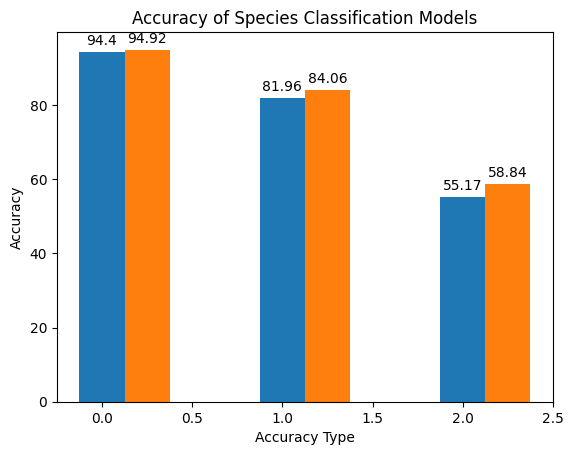

In [10]:
import matplotlib.pyplot as plt
import numpy as np


acc_type = ("Top 10", "Top 3", "Top 1")
accuracies = {
    'TF Lite': (sum(df['TFLite_top10'])/df.shape[0] * 100, sum(df['TFLite_top3'])/df.shape[0] * 100, sum(df['TFLite_top1'])/df.shape[0] * 100),
    'Pytorch': (sum(df['Pytorch_top10'])/df.shape[0] * 100, sum(df['Pytorch_top3'])/df.shape[0] * 100, sum(df['Pytorch_top1'])/df.shape[0] * 100),
}

x = np.arange(len(acc_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()#layout='constrained')

for attribute, measurement in accuracies.items():
    print_meas = [round(x, 2) for x in measurement]
    offset = width * multiplier
    rects = ax.bar(x + offset, print_meas, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_xlabel('Accuracy Type')
ax.set_title('Accuracy of Species Classification Models')
ax.set_xticks([x + 0.125 for x in list(range(0, len(acc_type)))], acc_type)
ax.legend()#loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [12]:
def calc_acc(true_col, pred_col):
    temp = [1 if df[true_col][i] == df[pred_col][i] else 0 for i in range(df.shape[0])] 
    temp = sum(temp)/df.shape[0] * 100
    return(temp)

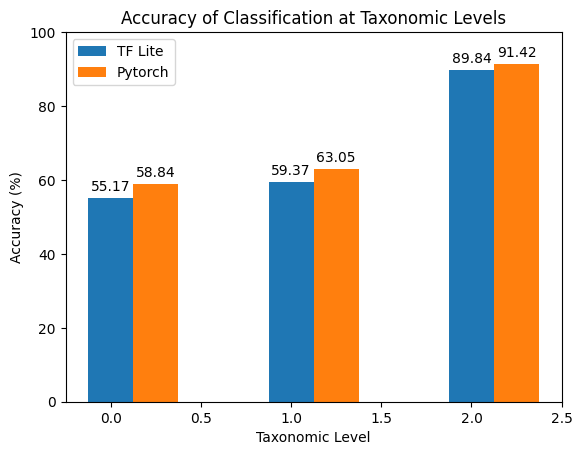

In [17]:
acc_type = ("Species", "Genus", "Family")

accuracies = {
    'TF Lite': (calc_acc('True_label', 'TFLite_prediction'), calc_acc('True_genus', 'TFLite_genus'), calc_acc('True_family', 'TFLite_family')),
    'Pytorch': (calc_acc('True_label', 'Pytorch_prediction'), calc_acc('True_genus', 'Pytorch_genus'), calc_acc('True_family', 'Pytorch_family')),
}

x = np.arange(len(acc_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()#layout='constrained')

for attribute, measurement in accuracies.items():
    print_meas = [round(x, 2) for x in measurement]
    offset = width * multiplier
    rects = ax.bar(x + offset, print_meas, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Taxonomic Level')
ax.set_title('Accuracy of Classification at Taxonomic Levels')
#ax.set_xticks([x + 0.125 for x in list(range(0, len(acc_type)))], acc_type)
ax.legend()#loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [18]:
df.loc[df['True_label_index'] == 0, ]

,True_label,True_family,True_genus,True_label_index,Pytorch_prediction,Pytorch_family,Pytorch_genus,Pytorch_prediction_index,TFLite_prediction,TFLite_family,TFLite_genus,TFLite_prediction_index,Pytorch_top10,Pytorch_top3,Pytorch_top1,TFLite_top10,TFLite_top3,TFLite_top1,Unnamed: 18


# Species Heatmap

In [19]:
df3 = pd.crosstab(df["TFLite_prediction"], df["True_label"], dropna=True, normalize="index")
df3 = df3.fillna(0)


# Force the df to be square
i = list(set(list(df["TFLite_prediction"]) + list(df["True_label"])))
df3 = df3.reindex(index=i, columns=i, fill_value=0)

df3.head()

True_label,Hylaea fasciaria,Deileptenia ribeata,Macaria bicolorata,Macaria wauaria,Phigalia pilosaria,Endromis versicolora,Lobophora halterata,Carsia sororiata,Macaria liturata,Lithostege griseata,...,Nephele accentifera,Philereme vetulata,Phibalapteryx virgata,Macroglossum stellatarum,Jodis lactearia,Odontopera bidentata,Ourapteryx sambucaria,Manduca sexta,Odontognophos dumetata,Macaria brunneata
TFLite_prediction,,,,,,,,,,,,,,,,,,,,,
Hylaea fasciaria,0.583333,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.027778,0.000000,0.027778,0.166667,0.000000,0.027778,0.000000,0.0,0.0
Deileptenia ribeata,0.000000,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Macaria bicolorata,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Macaria wauaria,0.000000,0.000000,0.000000,0.714286,0.071429,0.071429,0.000000,0.0,0.071429,0.071429,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Phigalia pilosaria,0.000000,0.000000,0.000000,0.000000,0.535714,0.000000,0.035714,0.0,0.035714,0.000000,...,0.0,0.035714,0.071429,0.071429,0.000000,0.035714,0.000000,0.035714,0.0,0.0


In [20]:
import operator

fam_dict = pd.Series(list(df.True_family) + list(df.True_family), index=list(df.True_label)+list(df.TFLite_prediction)).to_dict()
gen_dict = pd.Series(list(df.True_genus) + list(df.True_genus),index=list(df.True_label)+list(df.TFLite_prediction)).to_dict()

In [22]:
import seaborn as sns

In [23]:
fam_col = sns.color_palette("husl", len(set(fam_dict.values())))
gen_col = sns.color_palette("husl", len(set(gen_dict.values())))

fam_col = dict(zip(list(set(fam_dict.values())), [tuple(int(c*255) for c in cs) for cs in fam_col]))
gen_col = dict(zip(list(set(gen_dict.values())), [tuple(int(c*255) for c in cs) for cs in gen_col]))

# #colors = [tuple(t / 255 for t in x) for x in rgb]

fam_col = [fam_col[fam_dict[x]] for x in list(df3.columns)]
gen_col = [gen_col[gen_dict[x]] for x in list(df3.columns)]

fam_col = [tuple(round(t / 255, 2) for t in x) for x in fam_col]
gen_col = [tuple(round(t / 255, 2) for t in x) for x in gen_col]

fam_col[0:10]

[(0.96, 0.44, 0.53),
 (0.96, 0.44, 0.53),
 (0.96, 0.44, 0.53),
 (0.96, 0.44, 0.53),
 (0.96, 0.44, 0.53),
 (0.59, 0.64, 0.19),
 (0.96, 0.44, 0.53),
 (0.21, 0.67, 0.64),
 (0.96, 0.44, 0.53),
 (0.96, 0.44, 0.53)]

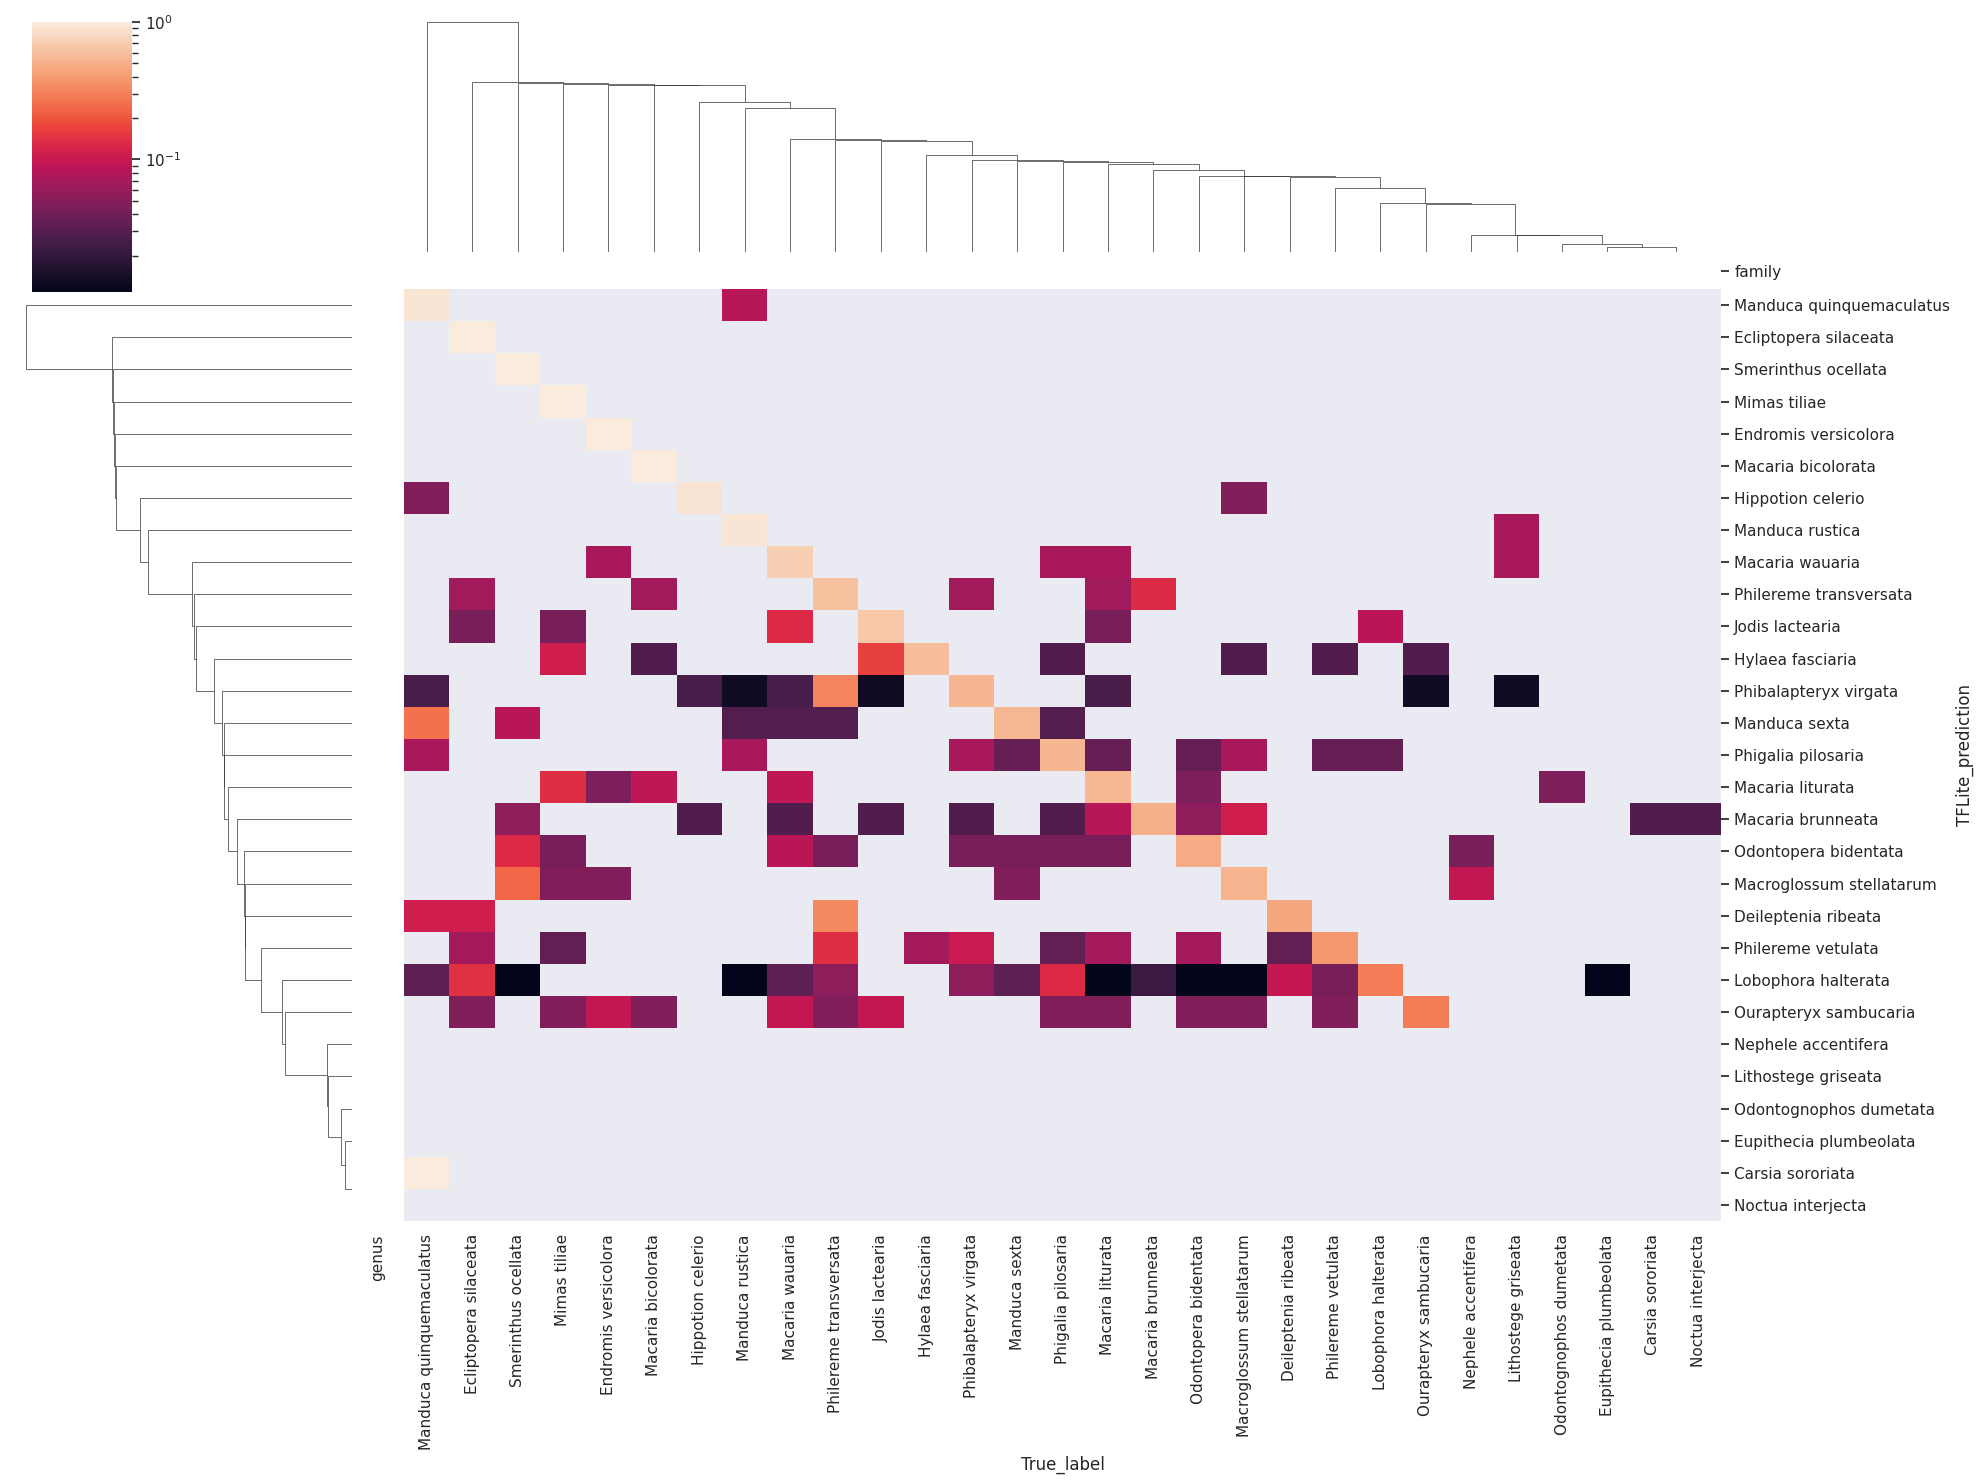

In [26]:
from scipy.cluster.hierarchy import linkage
import matplotlib

link = linkage(df3.transpose()) 

genus_colors = pd.DataFrame(data={'genus': gen_col }) 
family_colors = pd.DataFrame(data={'family': fam_col }) 

sns.set(font_scale=1)

sns.clustermap(df3, row_linkage=link, col_linkage=link, 
               row_colors=genus_colors, col_colors=family_colors, 
               norm=matplotlib.colors.LogNorm(), figsize=(20,15))


plt.show()

# Genus heatmap

In [27]:
df4 = pd.crosstab(df["TFLite_genus"], df["True_genus"], dropna=True, normalize="index")
df4 = df4.fillna(0)


# Force the df to be square
i = list(set(list(df["TFLite_genus"]) + list(df["True_genus"])))
df4 = df4.reindex(index=i, columns=i, fill_value=0)

df4.head()

True_genus,Noctua,Odontopera,Hylaea,Hippotion,Jodis,Endromis,Phibalapteryx,Ourapteryx,Ecliptopera,Smerinthus,...,Eupithecia,Mimas,Macroglossum,Odontognophos,Nephele,Lithostege,Manduca,Lobophora,Carsia,Deileptenia
TFLite_genus,,,,,,,,,,,,,,,,,,,,,
Noctua,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Odontopera,0.0,0.478261,0.000000,0.000000,0.000000,0.0,0.043478,0.000000,0.000000,0.130435,...,0.0,0.043478,0.000000,0.0,0.043478,0.0,0.043478,0.000000,0.0,0.0
Hylaea,0.0,0.000000,0.583333,0.000000,0.166667,0.0,0.000000,0.027778,0.000000,0.000000,...,0.0,0.111111,0.027778,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Hippotion,0.0,0.000000,0.000000,0.904762,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.047619,0.0,0.000000,0.0,0.047619,0.000000,0.0,0.0
Jodis,0.0,0.000000,0.000000,0.000000,0.652174,0.0,0.000000,0.000000,0.043478,0.000000,...,0.0,0.043478,0.000000,0.0,0.000000,0.0,0.000000,0.086957,0.0,0.0


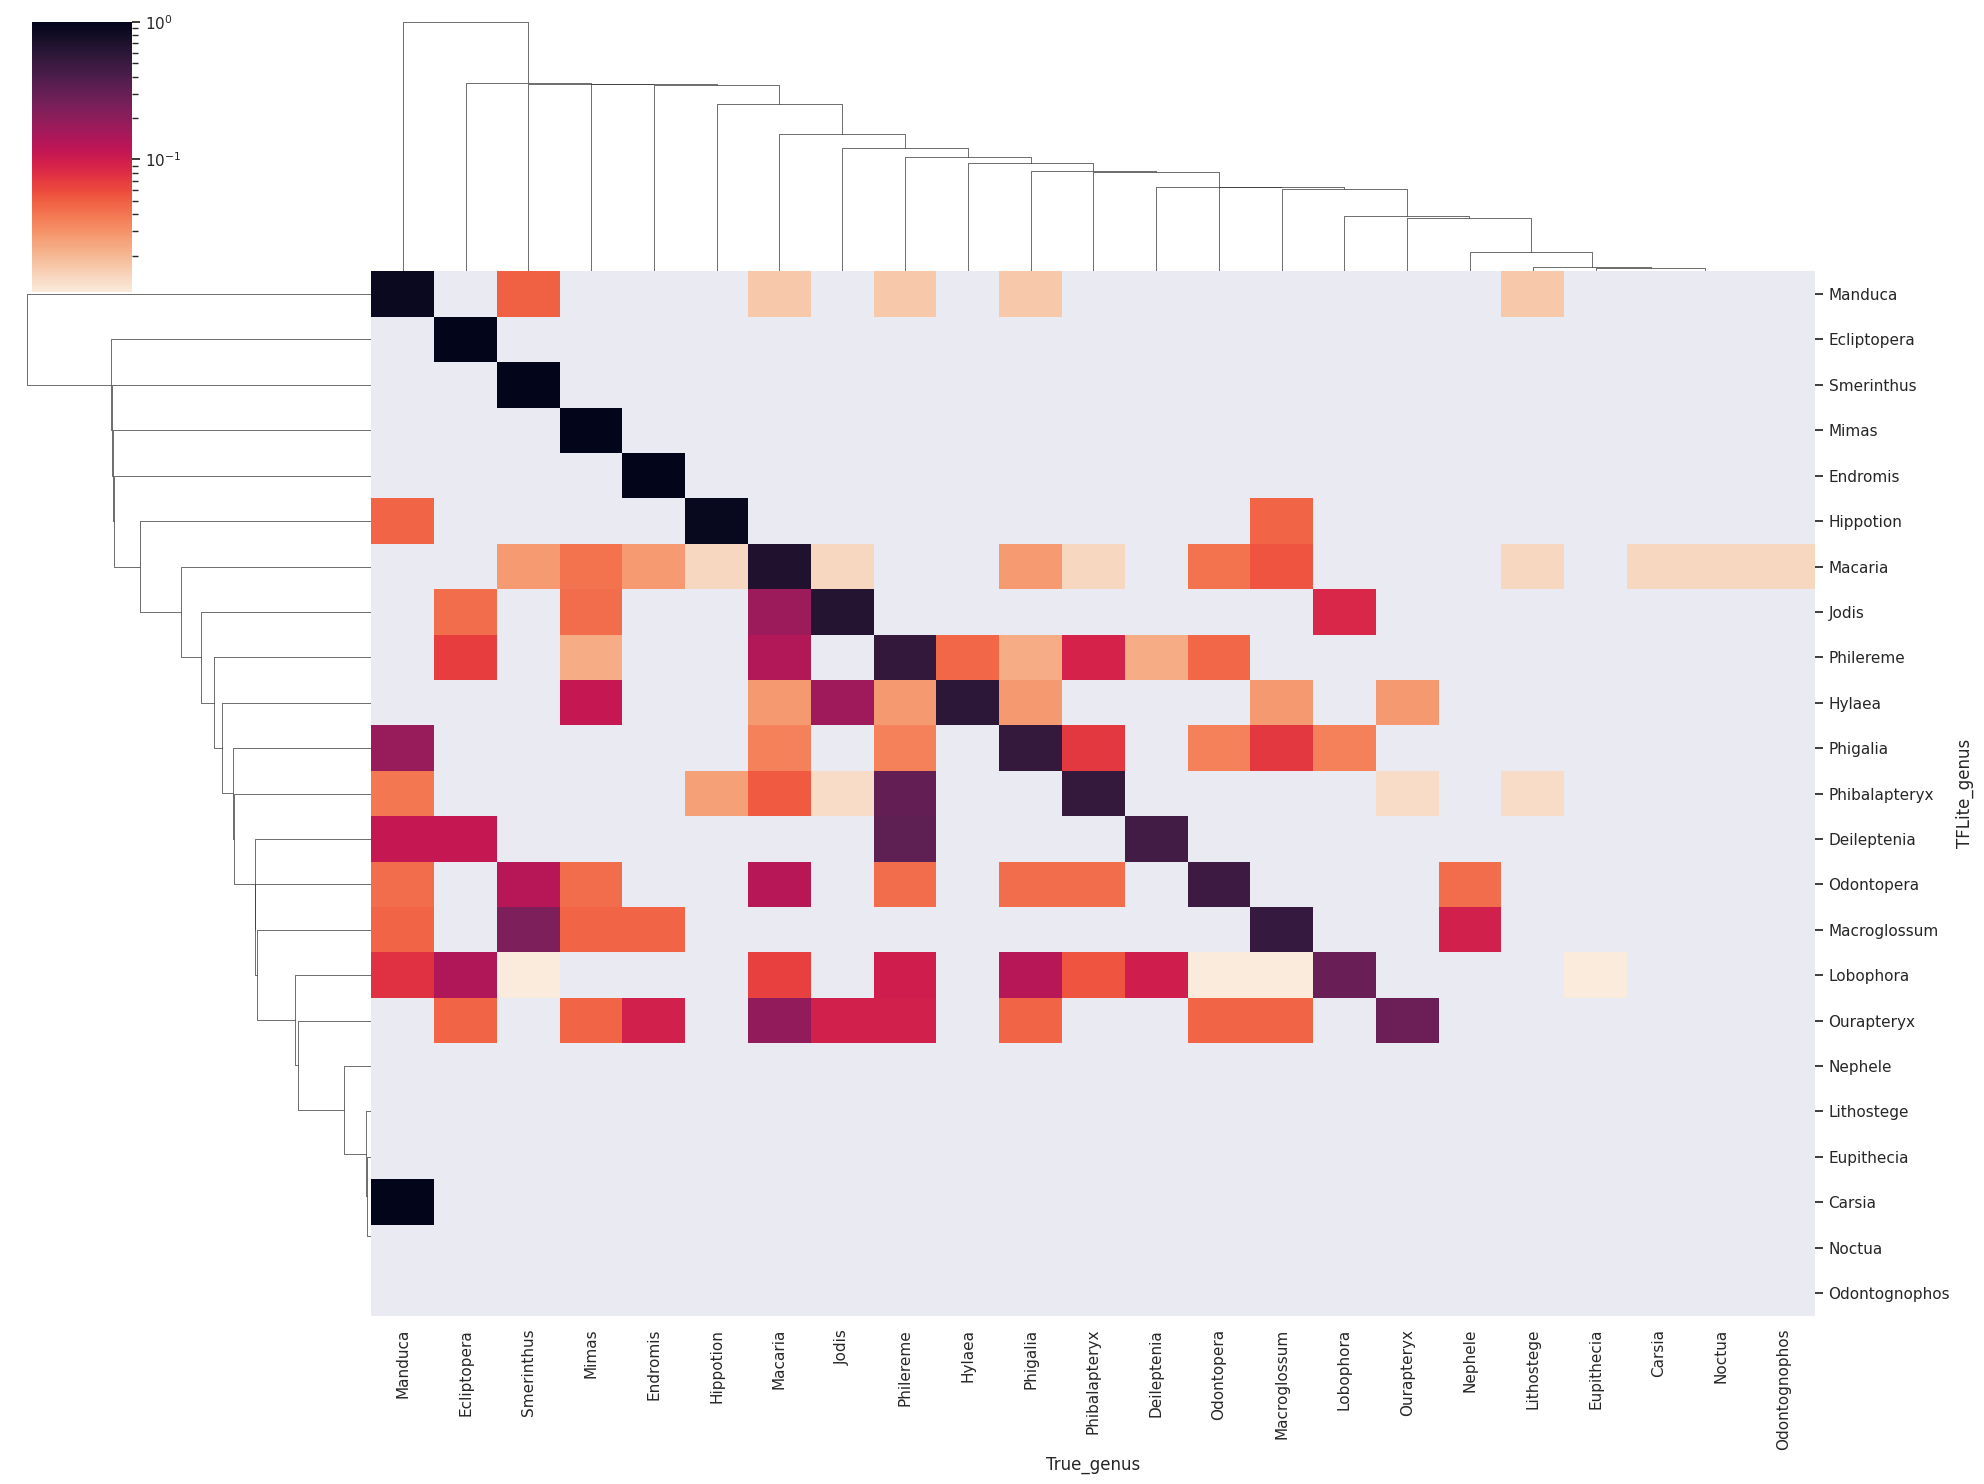

In [33]:
from scipy.cluster.hierarchy import linkage
import matplotlib

link = linkage(df4.transpose()) 

sns.set(font_scale=1)

sns.clustermap(df4, row_linkage=link, col_linkage=link, cmap=sns.cm.rocket_r,
               norm=matplotlib.colors.LogNorm(), figsize=(20,15))


plt.show()

# Family Heatmap

In [30]:
df5.head()

NameError: name 'df5' is not defined

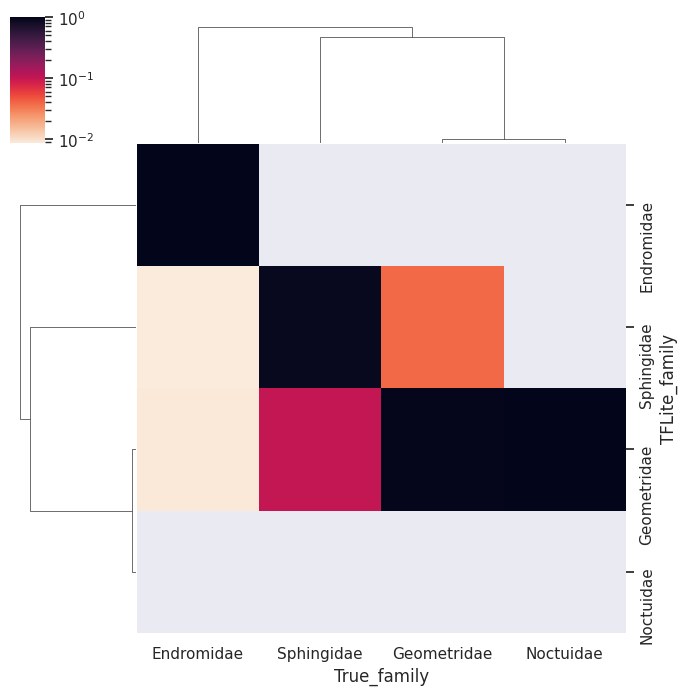

In [31]:
df5 = pd.crosstab(df["TFLite_family"], df["True_family"], dropna=True, normalize="index")
df5 = df5.fillna(0)
df5 = df5.div(df5.sum(axis=0), axis=1) # normalise to 1

# Force the df to be square
i = list(set(list(df["TFLite_family"]) + list(df["True_family"])))
df5 = df5.reindex(index=i, columns=i, fill_value=0)

link = linkage(df5.transpose()) 

sns.set(font_scale=1)

sns.clustermap(df5, row_linkage=link, col_linkage=link, cmap=sns.cm.rocket_r,
               norm=matplotlib.colors.LogNorm(), figsize=(7,7))


plt.show()

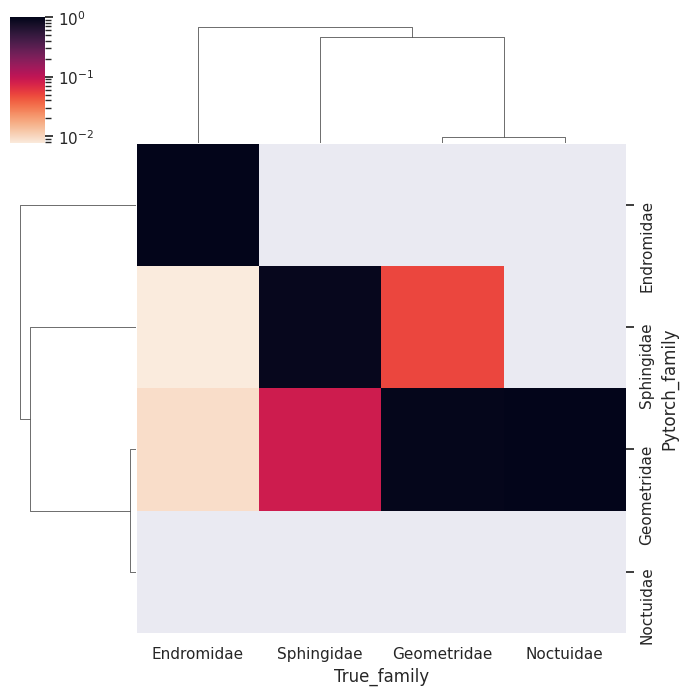

In [32]:
df5 = pd.crosstab(df["Pytorch_family"], df["True_family"], dropna=True, normalize="index")
df5 = df5.fillna(0)
df5 = df5.div(df5.sum(axis=0), axis=1) # normalise to 1

# Force the df to be square
i = list(set(list(df["Pytorch_family"]) + list(df["True_family"])))
df5 = df5.reindex(index=i, columns=i, fill_value=0)

link = linkage(df5.transpose()) 

sns.set(font_scale=1)

sns.clustermap(df5, row_linkage=link, col_linkage=link, cmap=sns.cm.rocket_r,
               norm=matplotlib.colors.LogNorm(), figsize=(7,7))


plt.show()